In [1]:
# SVM

In [2]:
import numpy as np

In [3]:
label_a = np.random.normal(6, 2, size = (50,2))
label_b = np.random.normal(-6, 2, size = (50,2))

In [4]:
import matplotlib.pyplot as plt

In [5]:
a = [1, 2, 3]
b = [-1,-2, -3]

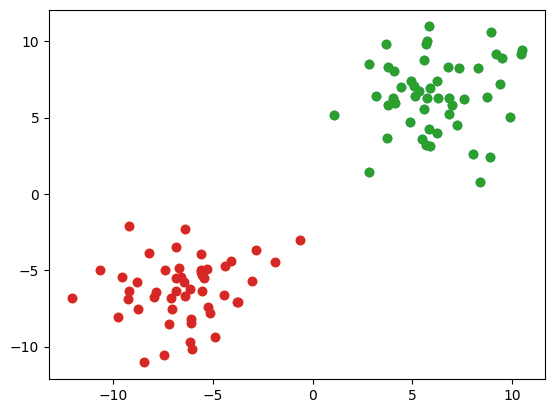

In [7]:
plt.scatter(*zip(*label_a))
plt.scatter(*zip(*label_b))
plt.show()

In [8]:
label_a_x = label_a[:, 0]
label_b_x = label_b[:, 0]

In [9]:
def f(x, k, b):
    return k*x -b

In [10]:
k_and_b = []
for i in range(100):
    k, b = (np.random.random(size = (1,2)) * 10 - 5)[0]

    if np.max(f(label_a_x, k, b)) <= -1 and np.min(f(label_b_x, k, b)) >= 1:
        print(k, b)
        k_and_b.append((k, b))

-3.4732670434285517 -2.3248316389039325
-3.654276254462583 0.01110189858052646
-2.4609031871010014 -0.3932180655739925
-2.9206497777762843 0.2595456609552631
-4.07589152330003 -0.6463313059119606
-3.1950366475236835 -1.8558958669742989
-4.316670785852706 -3.1033030808371653
-4.124339773909792 -1.5741734685470687
-4.20817621470405 0.4368323022696625
-3.7098120657624003 -0.38196175566618784
-3.2053446683533315 0.12822700803583054
-4.534694169094692 1.143734501297419
-4.8124714209376425 0.8707258703100704


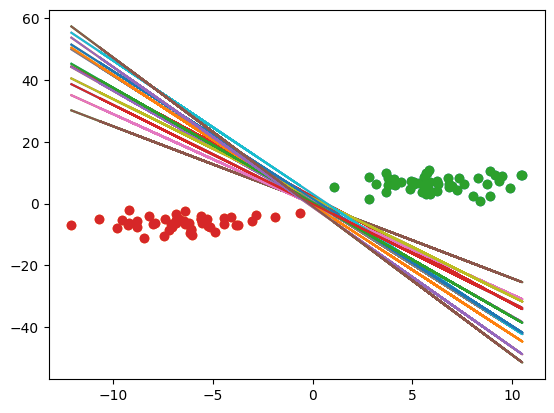

In [12]:
plt.scatter(*zip(*label_a))
plt.scatter(*zip(*label_b))

for k, b in k_and_b:
    x = np.concatenate((label_a_x, label_b_x))
    plt.plot(x, f(x, k, b))

plt.show()

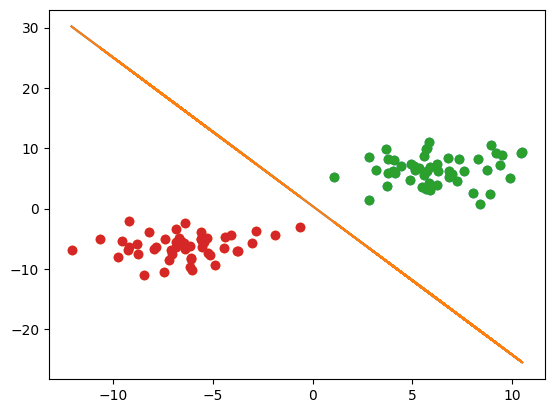

In [14]:
plt.scatter(*zip(*label_a))
plt.scatter(*zip(*label_b))

k,b = sorted(k_and_b, key = lambda t: abs(t[0]))[0]
x = np.concatenate((label_a_x, label_b_x))
plt.plot(x, f(x, k, b))
plt.show()

In [15]:
from sklearn.datasets import load_boston

In [22]:
datasets = load_boston()

In [23]:
data, target = datasets['data'], datasets['target']

In [24]:
import pandas as pd

In [25]:
df = pd.DataFrame(data)

In [26]:
df.columns = datasets['feature_names']

In [27]:
import random

In [28]:
def random_select(df, drop_num = 4):
    columns = random.sample(list(df.columns), k = len(df.columns) - drop_num)

    return df[columns]

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
sample_x = random_select(df)

In [32]:
regressioner = DecisionTreeRegressor()

In [34]:
(X_train, X_test, y_train, y_test)  = train_test_split(sample_x, target, test_size = 0.3)

In [35]:
regressioner.fit(X_train, y_train)

DecisionTreeRegressor()

In [37]:
regressioner.score(X_train, y_train)

1.0

In [38]:
regressioner.score(X_test, y_test)

0.8110635350395325

In [39]:
def random_tree(train_X, train_y, test_X, test_y, drop_n = 4):
    train_sample = random_select(train_X, drop_num = drop_n)

    regressioner = DecisionTreeRegressor()
    regressioner.fit(train_sample, train_y)

    train_score = regressioner.score(train_sample, train_y)
    test_score = regressioner.score(test_X[train_sample.columns], test_y)

    print('train score = {}; test score = {}'.format(train_score, test_score))

    y_predicat = regressioner.predict(test_X[train_sample.columns])

    return y_predicat

In [40]:
def random_forest(train_X, train_y, test_X, test_y, tree_n = 4):
    predicat = np.array([random_tree(train_X, train_y, test_X, test_y) for _ in range(tree_n)])

    return np.mean(predicat, axis = 0)

In [41]:
(X_train, X_test, y_train, y_test)  = train_test_split(df, target, test_size = 0.3)

forest_predict = random_forest(X_train, y_train, X_test, y_test)

train score = 1.0; test score = 0.5367061884031776
train score = 1.0; test score = 0.4983695562874999
train score = 1.0; test score = 0.6715869370883646
train score = 1.0; test score = 0.6210922529610217


In [42]:
forest_predict

array([10.925, 21.1  , 30.625, 28.025, 22.525, 17.65 , 20.6  , 17.325,
       29.175, 14.95 , 40.775, 19.55 , 12.175, 23.675, 10.775, 22.1  ,
       17.875, 17.6  , 21.075, 28.15 , 44.375, 25.1  , 21.55 , 23.625,
       21.   ,  9.325, 13.1  ,  8.75 , 32.   , 27.4  , 17.675, 19.675,
       22.975, 29.95 , 17.45 , 21.225, 30.5  , 23.35 , 19.925, 14.175,
        8.95 , 29.3  , 18.625, 20.925, 23.85 , 15.3  , 18.75 , 22.225,
       12.175,  9.55 , 18.025, 21.9  , 18.975, 23.95 , 29.975, 17.775,
       24.4  , 24.825, 21.5  , 14.05 , 21.5  , 49.625, 13.2  , 16.975,
       11.275, 26.425, 32.6  , 19.175, 17.6  , 13.7  , 33.85 , 28.2  ,
       15.65 , 17.925, 27.05 , 15.825,  9.275, 41.55 , 17.175, 22.25 ,
       21.775, 29.05 , 16.475,  9.65 , 25.9  , 18.375, 14.5  , 34.95 ,
       21.15 , 48.85 ,  8.775, 20.725, 33.325, 15.05 , 20.2  , 11.   ,
       10.5  , 10.75 , 22.3  , 30.   , 19.1  , 11.725, 20.375, 20.775,
       29.925, 13.5  , 19.575, 19.25 , 21.925, 23.95 , 33.65 , 12.75 ,
      

In [43]:
from sklearn.metrics import r2_score

In [44]:
r2_score(y_test, forest_predict)

0.7840500839091215

#  entropy: 熵

In [53]:
import numpy as np
from collections import Counter
from icecream import ic
from functools import lru_cache

In [54]:
def pr(es):
    counter = Counter(es)

    def _wrap(e):
        return counter[e] / len(es)

    return _wrap


def entropy(elements):
    # 信息熵
    p = pr(elements)

    return -np.sum(p(e) * np.log(p(e)) for e in set(elements))


def gini(elements):
    p = pr(elements)

    return 1 - np.sum(p(e) ** 2 for e in set(elements))

In [55]:
pure_func = gini

ic(pure_func([1, 1, 1, 1, 1, 0]))
ic(pure_func([1, 1, 1, 1, 1, 1]))
ic(pure_func([1, 2, 3, 4, 5, 8]))
ic(pure_func([1, 2, 3, 4, 5, 9]))
ic(pure_func(['a', 'b', 'c', 'c', 'c', 'c', 'c']))
ic(pure_func(['a', 'b', 'c', 'c', 'c', 'c', 'd']))

/Users/du/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
ic| pure_func([1, 1, 1, 1, 1, 0]): 0.2777777777777777
ic| pure_func([1, 1, 1, 1, 1, 1]): 0.0
ic| pure_func([1, 2, 3, 4, 5, 8]): 0.8333333333333333
ic| pure_func([1, 2, 3, 4, 5, 9]): 0.8333333333333333
ic| pure_func(['a', 'b', 'c', 'c', 'c', 'c', 'c']): 0.44897959183673464
ic| pure_func(['a', 'b', 'c', 'c', 'c', 'c', 'd']): 0.6122448979591837


0.6122448979591837

# random forest

In [57]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

In [58]:

house = load_boston()
X = house.data
y = house.target

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [60]:
print('whole dataset train acc: {}'.format(tree_reg.score(x_train, y_train)))
print('whole dataset test acc: {}'.format(tree_reg.score(x_test, y_test)))

whole dataset train acc: 1.0
whole dataset test acc: 0.6776520888466615


In [61]:
def random_forest(train_x, train_y, test_x, test_y, drop_n=4):
    random_features = np.random.choice(list(train_x.columns), size=len(train_x.columns)-drop_n)

    sample_x = train_x[random_features]
    sample_y = train_y

    reg = DecisionTreeRegressor()
    reg.fit(sample_x, sample_y)

    train_score = reg.score(sample_x, sample_y)
    test_score = reg.score(test_x[random_features], test_y)

    print('sub sample :: train score: {}, test score: {}'.format(train_score, test_score))

    y_predicated = reg.predict(test_x[random_features])

    return y_predicated, test_score

In [62]:
with_feature_names = pd.DataFrame(X)
with_feature_names.columns = house['feature_names']

In [63]:
x_train, x_test, y_train, y_test = train_test_split(with_feature_names, y, test_size=0.3, random_state=0)

In [64]:
tree_num = 4

In [65]:
predicates = []
for _ in range(tree_num):
    predicated, score = random_forest(x_train, y_train, x_test, y_test)
    predicates.append((predicated, score))

sub sample :: train score: 1.0, test score: 0.5640870175410873
sub sample :: train score: 1.0, test score: 0.29024437819534354
sub sample :: train score: 1.0, test score: 0.37812117132843814
sub sample :: train score: 1.0, test score: 0.5650888856735524


In [66]:
predicates_value = [v for v, s in predicates]
forest_scores = [s for v, s in predicates]

In [67]:
print('the score of forest is : {}'.format(r2_score(y_test, np.mean(predicates_value, axis=0))))

the score of forest is : 0.680193104551715


In [68]:
weights = np.array(forest_scores) / np.sum(forest_scores)

weights_score = np.zeros_like(np.mean(predicates_value, axis=0))

In [69]:
for i, v in enumerate(predicates_value):
    weights_score += v * weights[i]

In [70]:
print('the score of weighted forest is : {}'.format(r2_score(y_test, weights_score)))

the score of weighted forest is : 0.6956613076019385


# Show SVM

In [71]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
label_a = np.random.normal(6, 2, size=(50, 2))
label_b = np.random.normal(-6, 2, size=(50, 2))

In [73]:
plt.scatter(*zip(*label_a))
plt.scatter(*zip(*label_b))

label_a_x = label_a[:, 0]
label_b_x = label_b[:, 0]

In [74]:
def f(x, w, b):
    return w * x + b

In [75]:
k_and_b = []

In [76]:
for i in range(100):
    k, b = (np.random.random(size=(1, 2)) * 10 - 5)[0]

    if np.max(f(label_a_x, k, b)) >= -1 and np.min(f(label_b_x, k, b)) >= 1:
        print(k, b)
        k_and_b.append((k, b))

0.17732109082579406 3.9508645615428843
-0.8649868307954458 1.7349996177756957
-0.818317924604357 0.352843348193578
-0.19730603224472976 4.002168852007262
-1.4054638127338501 3.8133847819158166
-2.969555881178909 3.783398576539593
-1.2927323731846387 1.7591643914708648
-1.8180146397863108 2.8627248507293688
-2.895312368447632 3.0737177432181433
-0.446266364139829 3.3187213960326467
-2.5981106171964132 2.3501887823607905
-1.0889836275562992 1.717053220194976
-0.22179184622451853 3.1281079571868666
-1.9468810107211487 3.730420092966506
-1.7325674876671746 1.400137928951441
-4.297573765283488 4.8960158450396225
-2.2969567032985783 2.171321001904926


In [77]:
for k, b in k_and_b:
    x = np.concatenate((label_a_x, label_b_x))
    plt.plot(x, f(x, k, b))

In [78]:
print(k_and_b)

[(0.17732109082579406, 3.9508645615428843), (-0.8649868307954458, 1.7349996177756957), (-0.818317924604357, 0.352843348193578), (-0.19730603224472976, 4.002168852007262), (-1.4054638127338501, 3.8133847819158166), (-2.969555881178909, 3.783398576539593), (-1.2927323731846387, 1.7591643914708648), (-1.8180146397863108, 2.8627248507293688), (-2.895312368447632, 3.0737177432181433), (-0.446266364139829, 3.3187213960326467), (-2.5981106171964132, 2.3501887823607905), (-1.0889836275562992, 1.717053220194976), (-0.22179184622451853, 3.1281079571868666), (-1.9468810107211487, 3.730420092966506), (-1.7325674876671746, 1.400137928951441), (-4.297573765283488, 4.8960158450396225), (-2.2969567032985783, 2.171321001904926)]


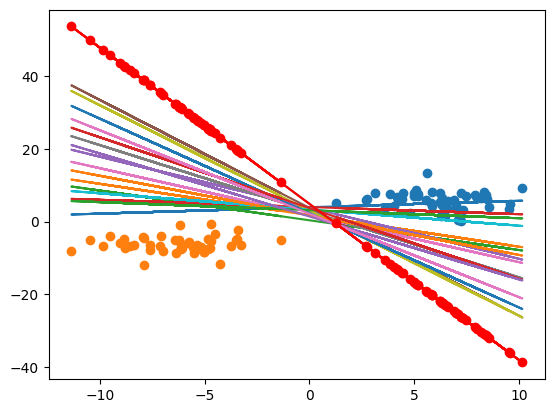

In [79]:
w, b = min(k_and_b, key=lambda k_b: k_b[0])

all_x = np.concatenate((label_a_x, label_b_x))
plt.plot(all_x, f(all_x, w, b), 'r-o')

plt.show()